In [1]:
#The first thing to do is to import the relevant libraries for this project
import pandas as pd
import numpy as np
import random as rnd

#Here I´ll import the data visualization tools
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
#Now, I´ll load the train and test dataframes, and take a look at their shape

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
dataframe = pd.concat([train, test])

In [3]:
print(f"train shape : {train.shape}  | test shape : {test.shape}")

train shape : (891, 12)  | test shape : (418, 11)


We see that that we have 891 people listed in the train dataset, as opposed to 418 in the test dataset, roughly a half. We can also see 12 columns, which represent the variables that will provide us the information necessary to create our prediction model

In [5]:
#Here, we´ll explore more in depth the train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We can see that the age dataset has a lot of null values, which may be due to lack of information on those passengers age. 687 of the passengers don´t have a cabin listed. This is possibly due to them being in the lower class ticket, and thus they probably shared comunal bedrooms.

In [12]:
#Here we see in terms of percentual of passengers on the train dataset.
#Obs: .T transposes index and columns
(train.isnull().sum()*100/train.shape[0]).sort_values(ascending = False).to_frame().T


,Cabin,Age,Embarked,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,77.104377,19.86532,0.224467,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Now, let´s take a look at other infos about our dataset: Head, Info, Describe and 

In [15]:
dataframe.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
#Here, we can see the types of variables in each class
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [17]:
dataframe.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,1309.0,655.000000,378.020061,1.00,328.0000,655.0000,982.000,1309.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.000,1.0000
Pclass,1309.0,2.294882,0.837836,1.00,2.0000,3.0000,3.000,3.0000
Age,1046.0,29.881138,14.413493,0.17,21.0000,28.0000,39.000,80.0000
SibSp,1309.0,0.498854,1.041658,0.00,0.0000,0.0000,1.000,8.0000
Parch,1309.0,0.385027,0.865560,0.00,0.0000,0.0000,0.000,9.0000
Fare,1308.0,33.295479,51.758668,0.00,7.8958,14.4542,31.275,512.3292


Some useful informations: 38,38% of the passengers survived, so our prediction model result should reflect that number.

We can also see that we have 3 categories of Pclass.

The 75% percentile at 39 years old shows us that very few old people were in the ship. We can check this with a bocplot later

In [22]:
#nunique returns the unique values of each column in the dataframe. The rest of the code is just me editing it to look better at the output
train.nunique().sort_values(ascending= False).to_frame().T

,PassengerId,Name,Ticket,Fare,Cabin,Age,SibSp,Parch,Pclass,Embarked,Survived,Sex
0,891,891,681,248,147,88,7,7,3,3,2,2


In [25]:
#Here, I´ll make a function in order to get the unique values for each column
def UniqueFeatures(coluna):
    contador = dataframe[coluna].nunique()
    print ("Unique values for %s : %d" % (coluna, contador))
    

In [59]:
women_survived=train[train.Sex=='female']['Survived'].sum()
women_total = len(train['Sex'][train.Sex =='female'])

SurvRate_w = women_survived / women_total

man_survived = train[train.Sex=='female']['Survived'].sum()
man_total = len(train['Sex'][train.Sex =='male'])

SurvRate_m = man_survived / man_total

SurvRate_w , SurvRate_m



(0.7420382165605095, 0.4038128249566724)

We can clearly see here that the percentage of women who survived is far greater than the male percentage, which makes sense, since there´s the Universal saying "Women and Children first".

That makes me want to compare the survival rate between ages.

C:\Users\duarteg\Anaconda3\envs\Python\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

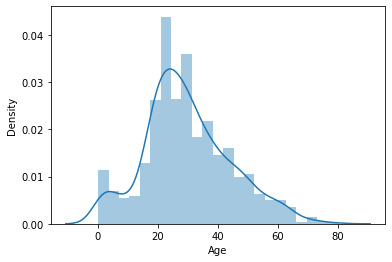

In [92]:
#Here, I want to take a look at the age distribution of the passengers.
age = dataframe['Age'].dropna() 
sns.distplot(age)




Here, we can see clearly that most people were between 20-40 years old, with very few people over 80 years old. 

In [95]:
#Now, let´s compare the survival rate in relation with the age of the passenger, and take a look and see if there are any correlations

survival_per_age = []


for Age in dataframe['Age']:
  if Age > 0:
      print(age)

    
survival_per_age



0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 1046, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 1046, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 1046, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 1046, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Age, Length: 1046, dtype: float64
0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
409     3.0
411    37.0
412    28.0
414    39.0
415    38.5
Name: Ag

[]